#Read the data


In [1]:
from datetime import datetime, date, time
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import seaborn as sns

df = pd.read_csv('/content/Complaints (1).csv')
df


,CASE_ID,OFFER_NAME,CUSTOMER_TYPE,CUSTOMER_GROUP,CURRENT_STATUS,ESCALATION_FLAG,ESCALATED_GROUP,OPEN_DATE,OPEN_USER,CLOSE_DATE,...,AGE_BRACKET,ACTUAL_COMPLAINT,CALLBACK_MECHANISM,RESOLUTION,RESOLUTION_DESCRIPTION,CASE_DESC,OPEN_GR,COMPLAINT_TYPE,PRODUCT,CASE
0,CAS-1060890-L3D6Q6,FTTH Home,CBU,FTTH Home,Resolved,Yes,F&I_BO,19.06.2022 06:07,DANA,21.06.2022 13:41,...,2.0,Actual Complaint,Phone,NaN,NaN,NaN,CBU / EBU - personal view,Technical,Internet,Technical complaint
1,CAS-388567-W4B9Q3,NaN,CBU,NaN,Resolved,Yes,Mobile_BO,04.04.2022 14:11,TCRMService,05.04.2022 12:13,...,1.0,Not Actual Complaint,Phone,NaN,NaN,NaN,System Administrator,Commercial,Mobile,Commercial claim
2,CAS-1494939-L9F0X7,Bitstream Home,CBU,Wanadoo-ADSL-Res,Resolved,No,NaN,03.08.2022 03:20,MOUTAZ,03.08.2022 03:20,...,1.0,User Not Filled,NaN,NaN,NaN,NaN,CBU - CC 1st Layer A,Technical,Internet,Technical complaint
3,CAS-1059985-K3Y9F7,FTTH Home,CBU,FTTH Home,Resolved,No,NaN,18.06.2022 20:38,MOATH,18.06.2022 20:38,...,1.0,User Not Filled,NaN,NaN,NaN,NaN,NaN,Technical,Internet,Technical complaint
4,CAS-1239942-Y1S2F5,FTTH Home,CBU,FTTH Home,Resolved,No,NaN,06.07.2022 01:22,IBRAHIM,06.07.2022 01:22,...,1.0,User Not Filled,NaN,NaN,NaN,NaN,CBU - CC 1st Layer A,Technical,Internet,Technical complaint
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10410,CAS-549162-Y2F4X6,OnLine Prepaid,CBU,Prepaid,Resolved,No,NaN,23.04.2022 09:31,ABRAR,23.04.2022 09:31,...,1.0,User Not Filled,NaN,NaN,NaN,NaN,NaN,Commercial,Mobile,Commercial claim
10411,CAS-1094578-B7J7Z0,FTTH Home,CBU,FTTH Home,Resolved,No,NaN,21.06.2022 19:40,AHMAD,21.06.2022 19:40,...,1.0,User Not Filled,NaN,NaN,NaN,NaN,CBU - CC 1st Layer A,Technical,Internet,Technical complaint
10412,CAS-470088-Q3Y2V7,FTTB Corporate,EBU,FTTB Corporate,Resolved,No,NaN,14.04.2022 14:36,YASMEEN,14.04.2022 14:36,...,1.0,User Not Filled,NaN,NaN,NaN,NaN,CBU - CC 1st Layer A,Technical,Internet,Technical complaint
10413,CAS-1249800-V2H6C7,Bitstream Home,CBU,Wanadoo-ADSL-Res,Resolved,No,NaN,07.07.2022 05:54,ALANOUD,07.07.2022 05:54,...,1.0,User Not Filled,NaN,NaN,NaN,NaN,CBU - CC 1st Layer A,Technical,Internet,Technical complaint


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10415 entries, 0 to 10414
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CASE_ID                 10415 non-null  object 
 1   OFFER_NAME              9122 non-null   object 
 2   CUSTOMER_TYPE           10415 non-null  object 
 3   CUSTOMER_GROUP          9067 non-null   object 
 4   CURRENT_STATUS          10415 non-null  object 
 5   ESCALATION_FLAG         10415 non-null  object 
 6   ESCALATED_GROUP         3360 non-null   object 
 7   OPEN_DATE               10415 non-null  object 
 8   OPEN_USER               10053 non-null  object 
 9   CLOSE_DATE              10296 non-null  object 
 10  CLOSE_GROUP             5525 non-null   object 
 11  CLOSE_USER              9899 non-null   object 
 12  AGE_BRACKET             10296 non-null  float64
 13  ACTUAL_COMPLAINT        10415 non-null  object 
 14  CALLBACK_MECHANISM      3138 non-null 

In [3]:
df.describe()

,AGE_BRACKET
count,10296.000000
mean,1.503302
std,2.978144
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,116.000000


#Preprocessing

In [4]:
df.isnull().sum()

,0
CASE_ID,0
OFFER_NAME,1293
CUSTOMER_TYPE,0
CUSTOMER_GROUP,1348
CURRENT_STATUS,0
ESCALATION_FLAG,0
ESCALATED_GROUP,7055
OPEN_DATE,0
OPEN_USER,362
CLOSE_DATE,119


In [5]:
del df["RESOLUTION"]
del df["RESOLUTION_DESCRIPTION"]
del df["CASE_DESC"]
del df["ESCALATED_GROUP"]
del df["CASE_ID"]
del df["CALLBACK_MECHANISM"]
del df["CLOSE_DATE"]
del df["OPEN_DATE"]

In [6]:
df["CLOSE_USER"].fillna("UNK-NOWN", inplace = True)
df["OPEN_USER"].fillna("UNKNOWN", inplace = True)
df["CLOSE_GROUP"].fillna("UNKNOWN", inplace = True)
df["OPEN_GR"].fillna("UNKNOWN", inplace = True)
df["OFFER_NAME"].fillna("NOT GIVEN ", inplace = True)
df["CUSTOMER_GROUP"].fillna("UNKNOWN", inplace = True)
df['AGE_BRACKET'] = df['AGE_BRACKET'].fillna(df['AGE_BRACKET'].mean())

In [7]:
df.describe()

,AGE_BRACKET
count,10415.000000
mean,1.503302
std,2.961080
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,116.000000


<Axes: xlabel='COMPLAINT_TYPE', ylabel='count'>

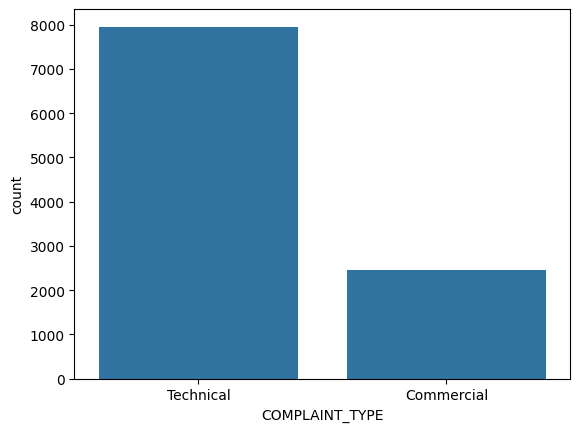

In [8]:
sns.countplot(x='COMPLAINT_TYPE', data=df)

#Data splitting

In [9]:
columns = df.select_dtypes(['object']).columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df[columns] = df[columns].apply(LabelEncoder().fit_transform)

df.head()

,OFFER_NAME,CUSTOMER_TYPE,CUSTOMER_GROUP,CURRENT_STATUS,ESCALATION_FLAG,OPEN_USER,CLOSE_GROUP,CLOSE_USER,AGE_BRACKET,ACTUAL_COMPLAINT,OPEN_GR,COMPLAINT_TYPE,PRODUCT,CASE
0,24,0,16,1,1,55,19,57,2.0,0,10,1,0,4
1,50,0,68,1,1,249,28,78,1.0,1,17,0,1,0
2,9,0,71,1,0,166,10,165,1.0,2,2,1,0,4
3,24,0,16,1,0,155,46,152,1.0,2,18,1,0,4
4,24,0,16,1,0,110,10,108,1.0,2,2,1,0,4


In [10]:
x = df.drop(["COMPLAINT_TYPE","OFFER_NAME","OPEN_USER","CLOSE_USER","OPEN_GR","CLOSE_GROUP"], axis=1)
y = df['COMPLAINT_TYPE']


In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5,random_state=0)
df

,OFFER_NAME,CUSTOMER_TYPE,CUSTOMER_GROUP,CURRENT_STATUS,ESCALATION_FLAG,OPEN_USER,CLOSE_GROUP,CLOSE_USER,AGE_BRACKET,ACTUAL_COMPLAINT,OPEN_GR,COMPLAINT_TYPE,PRODUCT,CASE
0,24,0,16,1,1,55,19,57,2.0,0,10,1,0,4
1,50,0,68,1,1,249,28,78,1.0,1,17,0,1,0
2,9,0,71,1,0,166,10,165,1.0,2,2,1,0,4
3,24,0,16,1,0,155,46,152,1.0,2,18,1,0,4
4,24,0,16,1,0,110,10,108,1.0,2,2,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10410,61,0,54,1,0,10,46,20,1.0,2,18,0,1,0
10411,24,0,16,1,0,12,46,23,1.0,2,2,1,0,4
10412,22,1,14,1,0,264,10,284,1.0,2,2,1,0,4
10413,9,0,71,1,0,18,10,28,1.0,2,2,1,0,4


In [12]:
SMOTE = SMOTE()
x_train, y_train = SMOTE.fit_resample(x_train, y_train)

#KNN


### Modeling

In [13]:
knn = KNeighborsClassifier(n_neighbors = 3)
a = []
r = []
p = []
f = []
for i in range(29):
  knn.fit(x_train, y_train)
  y_pred = knn.predict(x_test)

  acc = accuracy_score(y_test , y_pred)
  a.append(acc)

  rec = recall_score(y_test , y_pred  )
  r.append(rec)

  pre = precision_score(y_test , y_pred )
  p.append(pre)

  f1 = f1_score(y_test , y_pred )
  f.append(f1)

###Calculation

In [14]:
accknn =  sum(a)/len(a)
prcknn = sum(p)/len(p)
rcaknn = sum(r)/len(r)
f1knn = sum(f)/len(f)

In [15]:
print("ACCURACY = " , accknn)
print("Precision: ", prcknn)
print("Recall: ", rcaknn)
print("F1_score: ", f1knn)

ACCURACY =  0.986751152073733
Precision:  0.9900864260294862
Recall:  0.9923566878980888
F1_score:  0.9912202570301566


###Metrics

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1244,   39],
       [  30, 3895]])

###cross-validation

to make sure that we are on the correct way we will use the kfold cross-validation that will make us sure by calculate the training and the error for each fold

In [17]:
numSplits = 5
kfold = StratifiedKFold(n_splits=numSplits, shuffle=True, random_state=1024)
print(kfold)

# Create a list of neighbors to test
nList = [i for i in range(2, 10)]
train_scores, test_scores = [], []
avg_precision, avg_recall, avg_f1 = [], [], []

# Evaluate KNN for each value of n_neighbors
for n in nList:
    print('\nn neighbors:', n)
    trainFoldScoreList = []
    testFoldScoreList = []
    precisionList, recallList, f1List = [], [], []

    # Perform cross-validation
    for i, (train_index, test_index) in enumerate(kfold.split(x, y)):
        print('\tfold:', i)
        knn = KNeighborsClassifier(n_neighbors=n)

        # Fit the model for this fold
        knn.fit(x_train, y_train)

        # Evaluate on the train dataset
        train_yhat = knn.predict(x_train)
        train_acc = accuracy_score(y_train, train_yhat)
        print('\t\ttrain_acc:', train_acc)

        # Evaluate on the test dataset
        test_yhat = knn.predict(x_test)
        test_acc = accuracy_score(y_test, test_yhat)
        print('\t\ttest_acc:', test_acc)

        # Calculate precision, recall, and F1-score
        prec = precision_score(y_test, test_yhat)
        rec = recall_score(y_test, test_yhat)
        f1 = f1_score(y_test, test_yhat)

        # Store metrics
        trainFoldScoreList.append(train_acc)
        testFoldScoreList.append(test_acc)
        precisionList.append(prec)
        recallList.append(rec)
        f1List.append(f1)

    # Average metrics for this value of n_neighbors
    avgTrainAccuracy = np.mean(trainFoldScoreList)
    avgTestAccuracy = np.mean(testFoldScoreList)
    avgPrecision = np.mean(precisionList)
    avgRecall = np.mean(recallList)
    avgF1 = np.mean(f1List)

    print("\tAvg train Accuracy:", avgTrainAccuracy)
    print("\tAvg test Accuracy:", avgTestAccuracy)
    print("\tAvg Precision:", avgPrecision)
    print("\tAvg Recall:", avgRecall)
    print("\tAvg F1-score:", avgF1)

    # Append scores for plotting
    train_scores.append(avgTrainAccuracy)
    test_scores.append(avgTestAccuracy)
    avg_precision.append(avgPrecision)
    avg_recall.append(avgRecall)
    avg_f1.append(avgF1)

StratifiedKFold(n_splits=5, random_state=1024, shuffle=True)

n neighbors: 2
	fold: 0
		train_acc: 0.9934194189222747
		test_acc: 0.9855990783410138
	fold: 1
		train_acc: 0.9934194189222747
		test_acc: 0.9855990783410138
	fold: 2
		train_acc: 0.9934194189222747
		test_acc: 0.9855990783410138
	fold: 3
		train_acc: 0.9934194189222747
		test_acc: 0.9855990783410138
	fold: 4
		train_acc: 0.9934194189222747
		test_acc: 0.9855990783410138
	Avg train Accuracy: 0.9934194189222747
	Avg test Accuracy: 0.9855990783410139
	Avg Precision: 0.9918242207460398
	Avg Recall: 0.9890445859872612
	Avg F1-score: 0.9904324531190202

n neighbors: 3
	fold: 0
		train_acc: 0.9924261236652595
		test_acc: 0.9867511520737328
	fold: 1
		train_acc: 0.9924261236652595
		test_acc: 0.9867511520737328
	fold: 2
		train_acc: 0.9924261236652595
		test_acc: 0.9867511520737328
	fold: 3
		train_acc: 0.9924261236652595
		test_acc: 0.9867511520737328
	fold: 4
		train_acc: 0.9924261236652595
		test_acc: 0.9867511520737328
	Avg tr

####Ploting

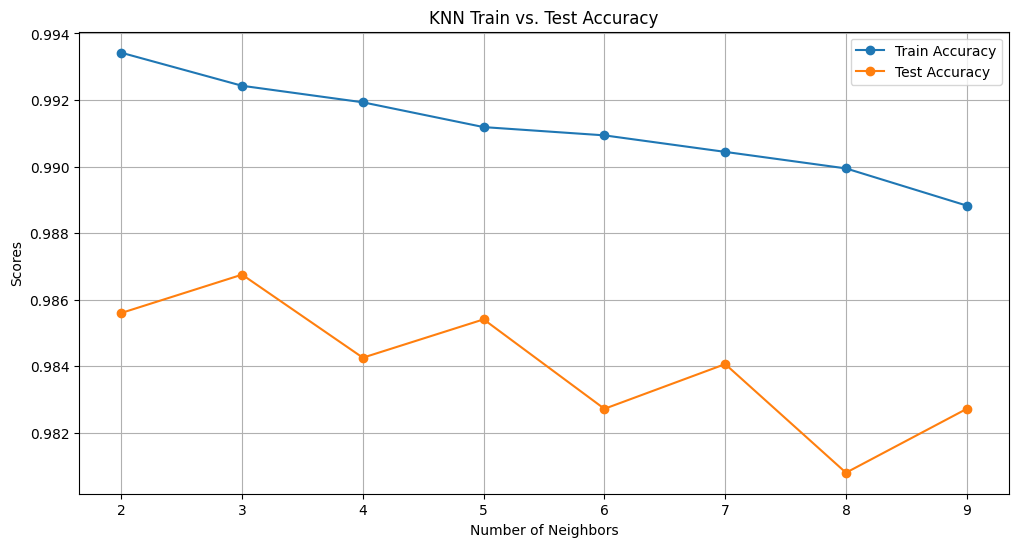

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(nList, train_scores, '-o', label='Train Accuracy')
plt.plot(nList, test_scores, '-o', label='Test Accuracy')
plt.legend()
plt.title("KNN Train vs. Test Accuracy")
plt.xlabel("Number of Neighbors")
plt.ylabel("Scores")
plt.grid(True)
plt.show()

#Logistic Regression

###Modeling

In [19]:
LR = LogisticRegression(max_iter = 10000)
LRacc = []
LRrca = []
LRprc = []
LRf1 = []


for b in range(29):
  LR.fit(x_train , y_train)
  y_pred = LR.predict(x_test)

  acc4 = accuracy_score(y_test , y_pred)
  LRacc.append(acc4)

  rca4 = recall_score(y_test , y_pred)
  LRrca.append(rca4)

  prc4 = precision_score(y_test , y_pred)
  LRprc.append(prc4)

  f1_4 = f1_score(y_test , y_pred)
  LRf1.append(f1_4)

###Calculation

In [20]:
LRacc = sum(LRacc)/len(LRacc)
LRrca = sum(LRrca)/len(LRrca)
LRprc =sum(LRprc)/len(LRprc)
LRf1 =sum(LRf1)/len(LRf1)

In [21]:
print('Accuracy: ',LRacc )
print("Precision: ",LRprc)
print("Recall: ",LRrca )
print("F1_score: ",LRf1 )

Accuracy:  0.9892473118279563
Precision:  0.9911144960649912
Recall:  0.9946496815286627
F1_score:  0.9928789420142426


###Metrics

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1248,   35],
       [  21, 3904]])

###cross-validation

In [23]:
numSplits = 5
kfold = StratifiedKFold(n_splits=numSplits, shuffle=True, random_state=1024)
print(kfold)

# Create a list of neighbors to test
nList = [i for i in range(2, 10)]
train_scores, test_scores = [], []
avg_precision, avg_recall, avg_f1 = [], [], []

# Evaluate LR for each value of n_neighbors
for n in nList:
    print('\nn neighbors:', n)
    trainFoldScoreList = []
    testFoldScoreList = []
    precisionList, recallList, f1List = [], [], []

    # Perform cross-validation
    for i, (train_index, test_index) in enumerate(kfold.split(x, y)):
        print('\tfold:', i)
        # Fit the model for this fold
        LR.fit(x_train, y_train)

        # Evaluate on the train dataset
        train_yhat = LR.predict(x_train)
        train_acc = accuracy_score(y_train, train_yhat)
        print('\t\ttrain_acc:', train_acc)

        # Evaluate on the test dataset
        test_yhat = LR.predict(x_test)
        test_acc = accuracy_score(y_test, test_yhat)
        print('\t\ttest_acc:', test_acc)

        # Calculate precision, recall, and F1-score
        prec = precision_score(y_test, test_yhat)
        rec = recall_score(y_test, test_yhat)
        f1 = f1_score(y_test, test_yhat)

        # Store metrics
        trainFoldScoreList.append(train_acc)
        testFoldScoreList.append(test_acc)
        precisionList.append(prec)
        recallList.append(rec)
        f1List.append(f1)

    # Average metrics for this value of n_neighbors
    avgTrainAccuracy = np.mean(trainFoldScoreList)
    avgTestAccuracy = np.mean(testFoldScoreList)
    avgPrecision = np.mean(precisionList)
    avgRecall = np.mean(recallList)
    avgF1 = np.mean(f1List)

    print("\tAvg train Accuracy:", avgTrainAccuracy)
    print("\tAvg test Accuracy:", avgTestAccuracy)
    print("\tAvg Precision:", avgPrecision)
    print("\tAvg Recall:", avgRecall)
    print("\tAvg F1-score:", avgF1)

    # Append scores for plotting
    train_scores.append(avgTrainAccuracy)
    test_scores.append(avgTestAccuracy)
    avg_precision.append(avgPrecision)
    avg_recall.append(avgRecall)
    avg_f1.append(avgF1)

StratifiedKFold(n_splits=5, random_state=1024, shuffle=True)

n neighbors: 2
	fold: 0
		train_acc: 0.9891979140799603
		test_acc: 0.989247311827957
	fold: 1
		train_acc: 0.9891979140799603
		test_acc: 0.989247311827957
	fold: 2
		train_acc: 0.9891979140799603
		test_acc: 0.989247311827957
	fold: 3
		train_acc: 0.9891979140799603
		test_acc: 0.989247311827957
	fold: 4
		train_acc: 0.9891979140799603
		test_acc: 0.989247311827957
	Avg train Accuracy: 0.9891979140799603
	Avg test Accuracy: 0.989247311827957
	Avg Precision: 0.9911144960649911
	Avg Recall: 0.9946496815286624
	Avg F1-score: 0.9928789420142421

n neighbors: 3
	fold: 0
		train_acc: 0.9891979140799603
		test_acc: 0.989247311827957
	fold: 1
		train_acc: 0.9891979140799603
		test_acc: 0.989247311827957
	fold: 2
		train_acc: 0.9891979140799603
		test_acc: 0.989247311827957
	fold: 3
		train_acc: 0.9891979140799603
		test_acc: 0.989247311827957
	fold: 4
		train_acc: 0.9891979140799603
		test_acc: 0.989247311827957
	Avg train Accurac

####Ploting

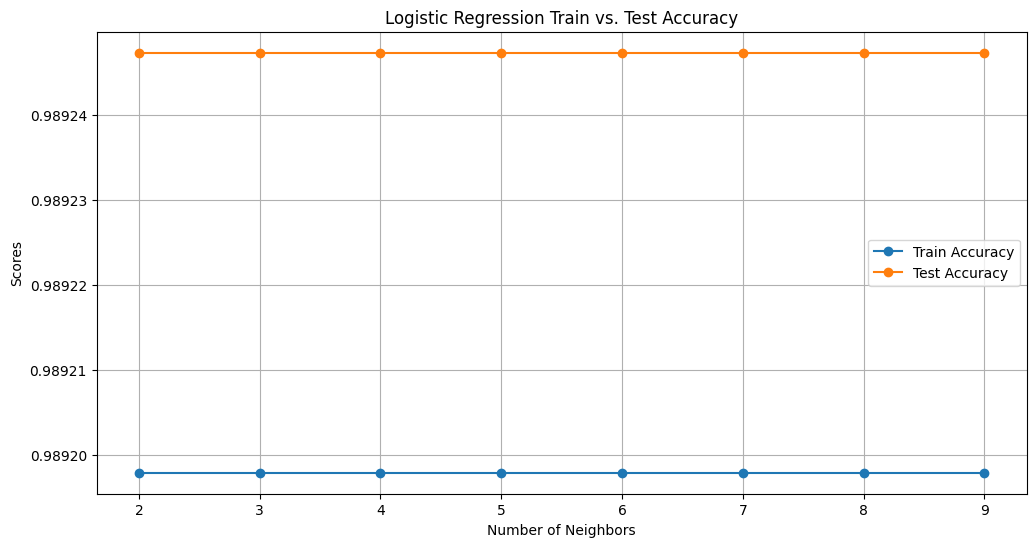

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(nList, train_scores, '-o', label='Train Accuracy')
plt.plot(nList, test_scores, '-o', label='Test Accuracy')
plt.legend()
plt.title("Logistic Regression Train vs. Test Accuracy")
plt.xlabel("Number of Neighbors")
plt.ylabel("Scores")
plt.grid(True)
plt.show()

#Decision Tree

####Modeling

In [25]:
DT = DecisionTreeClassifier()
dtacc = []
dtrca = []
dtprc = []
dtf1 = []



for o in range(29):
  DT.fit(x_train , y_train)
  y_pred = DT.predict(x_test)

  acc2 = accuracy_score(y_test , y_pred)
  dtacc.append(acc2)

  rca2 = recall_score(y_test , y_pred)
  dtrca.append(rca2)

  prc2 = precision_score(y_test , y_pred)
  dtprc.append(prc2)

  f1_2 = f1_score(y_test , y_pred)
  dtf1.append(f1_2)

###Calculation

In [26]:
dtacc = sum(dtacc)/len(dtacc)
dtrca = sum(dtrca)/len(dtrca)
dtprc = sum(dtprc)/len(dtprc)
dtf1 = sum(dtf1)/len(dtf1)

In [27]:
print('Accuracy: ',dtacc )
print("Recall: ",dtrca )
print("Precision: ",dtprc )
print("F1_score: ",dtf1 )

Accuracy:  0.9868637110016418
Recall:  0.9903623984186246
Precision:  0.992192978578067
F1_score:  0.9912768081189793


###Metrics

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1253,   30],
       [  39, 3886]])

###cross-validation

In [29]:
numSplits = 5
kfold = StratifiedKFold(n_splits=numSplits, shuffle=True, random_state=1024)
print(kfold)

# Create a list of neighbors to test
nList = [i for i in range(2, 10)]
train_scores, test_scores = [], []
avg_precision, avg_recall, avg_f1 = [], [], []

# Evaluate DT for each value of n_neighbors
for n in nList:
    print('\nn neighbors:', n)
    trainFoldScoreList = []
    testFoldScoreList = []
    precisionList, recallList, f1List = [], [], []

    # Perform cross-validation
    for i, (train_index, test_index) in enumerate(kfold.split(x, y)):
        print('\tfold:', i)
        # Fit the model for this fold
        DT.fit(x_train, y_train)

        # Evaluate on the train dataset
        train_yhat = DT.predict(x_train)
        train_acc = accuracy_score(y_train, train_yhat)
        print('\t\ttrain_acc:', train_acc)

        # Evaluate on the test dataset
        test_yhat = DT.predict(x_test)
        test_acc = accuracy_score(y_test, test_yhat)
        print('\t\ttest_acc:', test_acc)

        # Calculate precision, recall, and F1-score
        prec = precision_score(y_test, test_yhat)
        rec = recall_score(y_test, test_yhat)
        f1 = f1_score(y_test, test_yhat)

        # Store metrics
        trainFoldScoreList.append(train_acc)
        testFoldScoreList.append(test_acc)
        precisionList.append(prec)
        recallList.append(rec)
        f1List.append(f1)

    # Average metrics for this value of n_neighbors
    avgTrainAccuracy = np.mean(trainFoldScoreList)
    avgTestAccuracy = np.mean(testFoldScoreList)
    avgPrecision = np.mean(precisionList)
    avgRecall = np.mean(recallList)
    avgF1 = np.mean(f1List)

    print("\tAvg train Accuracy:", avgTrainAccuracy)
    print("\tAvg test Accuracy:", avgTestAccuracy)
    print("\tAvg Precision:", avgPrecision)
    print("\tAvg Recall:", avgRecall)
    print("\tAvg F1-score:", avgF1)

    # Append scores for plotting
    train_scores.append(avgTrainAccuracy)
    test_scores.append(avgTestAccuracy)
    avg_precision.append(avgPrecision)
    avg_recall.append(avgRecall)
    avg_f1.append(avgF1)

StratifiedKFold(n_splits=5, random_state=1024, shuffle=True)

n neighbors: 2
	fold: 0
		train_acc: 0.9957784951576856
		test_acc: 0.9869431643625192
	fold: 1
		train_acc: 0.9957784951576856
		test_acc: 0.9869431643625192
	fold: 2
		train_acc: 0.9957784951576856
		test_acc: 0.9867511520737328
	fold: 3
		train_acc: 0.9957784951576856
		test_acc: 0.9869431643625192
	fold: 4
		train_acc: 0.9957784951576856
		test_acc: 0.9869431643625192
	Avg train Accuracy: 0.9957784951576855
	Avg test Accuracy: 0.9869047619047618
	Avg Precision: 0.9921396793755886
	Avg Recall: 0.9904713375796177
	Avg F1-score: 0.9913047832816442

n neighbors: 3
	fold: 0
		train_acc: 0.9957784951576856
		test_acc: 0.9869431643625192
	fold: 1
		train_acc: 0.9957784951576856
		test_acc: 0.9867511520737328
	fold: 2
		train_acc: 0.9957784951576856
		test_acc: 0.9869431643625192
	fold: 3
		train_acc: 0.9957784951576856
		test_acc: 0.9869431643625192
	fold: 4
		train_acc: 0.9957784951576856
		test_acc: 0.9869431643625192
	Avg tr

####Ploting

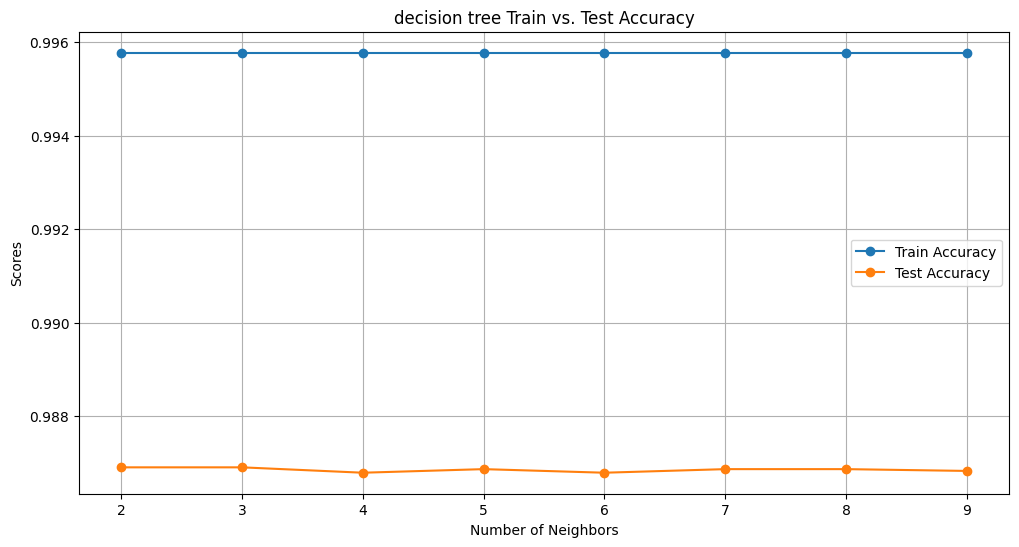

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(nList, train_scores, '-o', label='Train Accuracy')
plt.plot(nList, test_scores, '-o', label='Test Accuracy')
plt.legend()
plt.title("decision tree Train vs. Test Accuracy")
plt.xlabel("Number of Neighbors")
plt.ylabel("Scores")
plt.grid(True)
plt.show()

#Naive Bayes

###Modeling

In [31]:
NB = GaussianNB()
NBacc = []
NBrca = []
NBprc = []
NBf1 = []



for t in range(29):
  NB = NB.fit(x_train , y_train)
  y_pred = NB.predict(x_test)

  acc3 = accuracy_score(y_test , y_pred)
  NBacc.append(acc3)

  rca3 = recall_score(y_test , y_pred)
  NBrca.append(rca3)

  prc3 = precision_score(y_test , y_pred)
  NBprc.append(prc3)

  f1_3 = f1_score(y_test , y_pred)
  NBf1.append(f1_3)


###Calculation

In [32]:
NBacc = sum(NBacc)/len(NBacc)
NBrca = sum(NBrca)/len(NBrca)
NBprc = sum(NBprc)/len(NBprc)
NBf1 = sum(NBf1)/len(NBf1)

In [33]:
print('Accuracy: ',NBacc )
print("Precision: ",NBprc )
print("Recall: ",NBrca )
print("F1_score: ",NBf1 )

Accuracy:  0.983486943164362
Precision:  0.9912976708471969
Recall:  0.9867515923566873
F1_score:  0.9890194075587326


###Metrics

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1249,   34],
       [  52, 3873]])

###cross-validation

In [35]:
numSplits = 5
kfold = StratifiedKFold(n_splits=numSplits, shuffle=True, random_state=1024)
print(kfold)

# Create a list of neighbors to test
nList = [i for i in range(2, 10)]
train_scores, test_scores = [], []
avg_precision, avg_recall, avg_f1 = [], [], []

# Evaluate NB for each value of n_neighbors
for n in nList:
    print('\nn neighbors:', n)
    trainFoldScoreList = []
    testFoldScoreList = []
    precisionList, recallList, f1List = [], [], []

    # Perform cross-validation
    for i, (train_index, test_index) in enumerate(kfold.split(x, y)):
        print('\tfold:', i)
        # Fit the model for this fold
        NB.fit(x_train, y_train)

        # Evaluate on the train dataset
        train_yhat = NB.predict(x_train)
        train_acc = accuracy_score(y_train, train_yhat)
        print('\t\ttrain_acc:', train_acc)

        # Evaluate on the test dataset
        test_yhat = NB.predict(x_test)
        test_acc = accuracy_score(y_test, test_yhat)
        print('\t\ttest_acc:', test_acc)

        # Calculate precision, recall, and F1-score
        prec = precision_score(y_test, test_yhat)
        rec = recall_score(y_test, test_yhat)
        f1 = f1_score(y_test, test_yhat)

        # Store metrics
        trainFoldScoreList.append(train_acc)
        testFoldScoreList.append(test_acc)
        precisionList.append(prec)
        recallList.append(rec)
        f1List.append(f1)

    # Average metrics for this value of n_neighbors
    avgTrainAccuracy = np.mean(trainFoldScoreList)
    avgTestAccuracy = np.mean(testFoldScoreList)
    avgPrecision = np.mean(precisionList)
    avgRecall = np.mean(recallList)
    avgF1 = np.mean(f1List)

    print("\tAvg train Accuracy:", avgTrainAccuracy)
    print("\tAvg test Accuracy:", avgTestAccuracy)
    print("\tAvg Precision:", avgPrecision)
    print("\tAvg Recall:", avgRecall)
    print("\tAvg F1-score:", avgF1)

    # Append scores for plotting
    train_scores.append(avgTrainAccuracy)
    test_scores.append(avgTestAccuracy)
    avg_precision.append(avgPrecision)
    avg_recall.append(avgRecall)
    avg_f1.append(avgF1)

StratifiedKFold(n_splits=5, random_state=1024, shuffle=True)

n neighbors: 2
	fold: 0
		train_acc: 0.9855972187732803
		test_acc: 0.9834869431643625
	fold: 1
		train_acc: 0.9855972187732803
		test_acc: 0.9834869431643625
	fold: 2
		train_acc: 0.9855972187732803
		test_acc: 0.9834869431643625
	fold: 3
		train_acc: 0.9855972187732803
		test_acc: 0.9834869431643625
	fold: 4
		train_acc: 0.9855972187732803
		test_acc: 0.9834869431643625
	Avg train Accuracy: 0.9855972187732803
	Avg test Accuracy: 0.9834869431643625
	Avg Precision: 0.9912976708471973
	Avg Recall: 0.9867515923566879
	Avg F1-score: 0.9890194075587333

n neighbors: 3
	fold: 0
		train_acc: 0.9855972187732803
		test_acc: 0.9834869431643625
	fold: 1
		train_acc: 0.9855972187732803
		test_acc: 0.9834869431643625
	fold: 2
		train_acc: 0.9855972187732803
		test_acc: 0.9834869431643625
	fold: 3
		train_acc: 0.9855972187732803
		test_acc: 0.9834869431643625
	fold: 4
		train_acc: 0.9855972187732803
		test_acc: 0.9834869431643625
	Avg tr

####Ploting

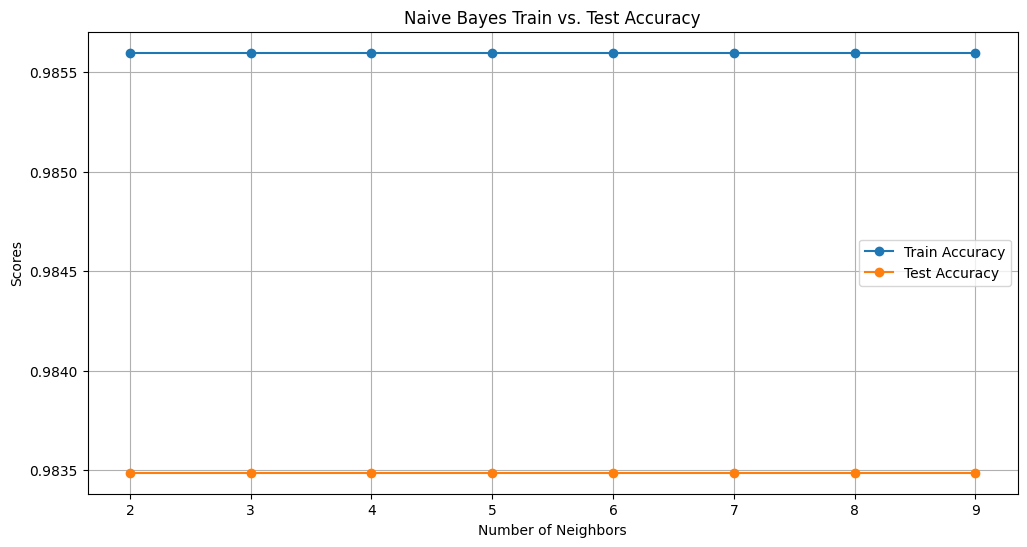

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(nList, train_scores, '-o', label='Train Accuracy')
plt.plot(nList, test_scores, '-o', label='Test Accuracy')
plt.legend()
plt.title("Naive Bayes Train vs. Test Accuracy")
plt.xlabel("Number of Neighbors")
plt.ylabel("Scores")
plt.grid(True)
plt.show()

#Model evaluation (visualization)


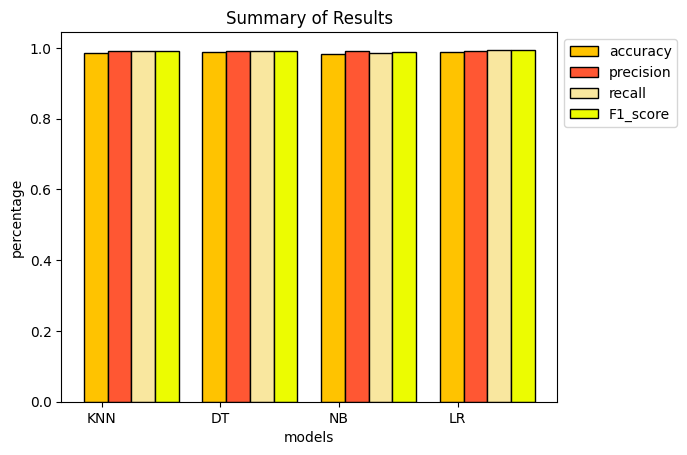

In [37]:
from sklearn import model_selection
model = ['KNN','DT','NB','LR']
machine_learning_model_acc = [accknn,dtacc,NBacc,LRacc]
machine_learning_model_prc = [prcknn,dtprc,NBprc,LRprc]
machine_learning_model_rca = [rcaknn,dtrca,NBrca,LRrca]
machine_learning_model_f1 = [f1knn,dtf1,NBf1,LRf1]
X_axis = np.arange(len(model))

plt.bar(X_axis+0.15, machine_learning_model_acc, color ='#FFC300',width = 0.2,edgecolor = 'black',label = 'accuracy')
plt.bar(X_axis + 0.35, machine_learning_model_prc, color ='#FF5733',width = 0.2,edgecolor = 'black',label = 'precision')
plt.bar(X_axis + 0.55, machine_learning_model_rca, color ='#F9E79F',width = 0.2,edgecolor = 'black',label = 'recall')
plt.bar(X_axis + 0.75, machine_learning_model_f1, color ='#ECFC01',width = 0.2,edgecolor = 'black',label = 'F1_score')

plt.xticks(X_axis+0.2,model )
plt.legend(bbox_to_anchor=(1, 1))


plt.xlabel("models")
plt.ylabel("percentage")
plt.title("Summary of Results")
plt.show()

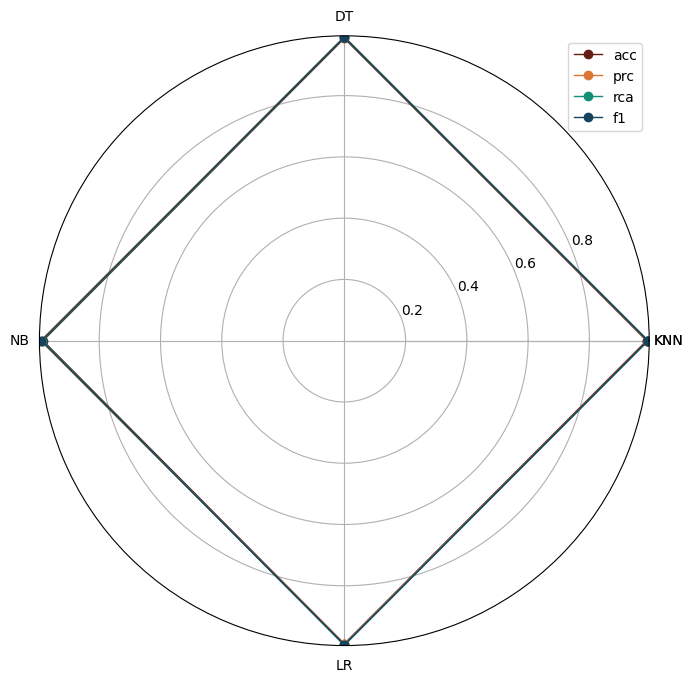

In [38]:
model = ['KNN','DT','NB','LR']
machine_learning_model_acc = [accknn,dtacc,NBacc,LRacc]
machine_learning_model_prc = [prcknn,dtprc,NBprc,LRprc]
machine_learning_model_rca = [rcaknn,dtrca,NBrca,LRrca]
machine_learning_model_f1 = [f1knn,dtf1,NBf1,LRf1]

angles = np.linspace(0 , 2 * np.pi , len(model) , endpoint = False)
angles = np.concatenate((angles,[angles[0]]))

model.append(model[0])

machine_learning_model_acc.append(machine_learning_model_acc[0])
machine_learning_model_prc.append(machine_learning_model_prc[0])
machine_learning_model_rca.append(machine_learning_model_rca[0])
machine_learning_model_f1.append(machine_learning_model_f1[0])



fig = plt.figure(figsize = (7 , 7))
axes=fig.add_subplot(111 , polar = True)
axes.plot(angles , machine_learning_model_acc , 'o-' , color = '#641E16', linewidth = 1 , label = 'acc')
axes.plot(angles , machine_learning_model_prc , 'o-' , color = '#DC7633', linewidth = 1 , label = 'prc')
axes.plot(angles , machine_learning_model_rca ,  'o-' , color = '#148F77' , linewidth = 1 , label = 'rca')
axes.plot(angles , machine_learning_model_f1,  'o-' , color = '#154360' , linewidth = 1 , label = 'f1')

axes.set_thetagrids(angles * 180 / np.pi, model)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()